In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/My Drive/Data/Sales Forecasting/data.csv",encoding='unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
#creating YearMonth field for the ease of reporting and visualization
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['InvoiceYear'] = df['InvoiceDate'].dt.year
df['InvoiceMonth'] = df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,201012


In [ ]:
#f['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)

#calculate Revenue for each row and create a new dataframe with YearMonth - Revenue columns
df['Revenue'] = df['UnitPrice'] * df['Quantity']
tx_revenue = df.groupby(['InvoiceYear','InvoiceMonth'])['Revenue'].sum().reset_index()
tx_revenue

,InvoiceYear,InvoiceMonth,Revenue
0,2010,12,748957.020
1,2011,1,560000.260
2,2011,2,498062.650
3,2011,3,683267.080
4,2011,4,493207.121
5,2011,5,723333.510
6,2011,6,691123.120
7,2011,7,681300.111
8,2011,8,682680.510
9,2011,9,1019687.622


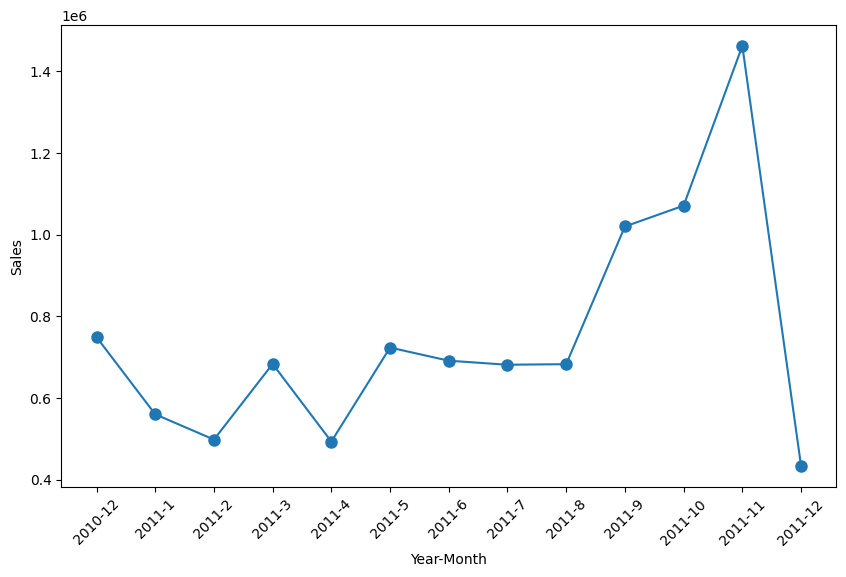

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the line chart
ax.plot(tx_revenue['InvoiceYear'].astype(str) + '-' + tx_revenue['InvoiceMonth'].astype(str), tx_revenue['Revenue'], '-o',markersize=8)


# Set the x-axis and y-axis labels
ax.set_xlabel('Year-Month')
ax.set_ylabel('Sales')

xtick_labels = tx_revenue['InvoiceYear'].astype(str) + '-' + tx_revenue['InvoiceMonth'].astype(str)
ax.set_xticks(xtick_labels[::1])  # Change the step value to adjust the frequency of labels
ax.set_xticklabels(xtick_labels[::1], rotation=45)


# Show the plot
plt.show()

**MONTHLY REVENUE GROWTH**

In [ ]:
#using pct_change() function to see monthly percentage change
#THIS LIBRARY .PCT_CHANGE GIVES US SOME THING LIKE (CURRENT - PREVIOUS / PREVIOUS)
tx_revenue['MonthlyGrowth'] = tx_revenue['Revenue'].pct_change()
#tx_revenue
#WE DONOT HAVE 2011 -12 MONTHS DATA SO i AM REMOVING THAT 
tx_revenue= tx_revenue[~(tx_revenue['InvoiceYear']!=2011 ) & (tx_revenue['InvoiceMonth']!=12)]
tx_revenue

,InvoiceYear,InvoiceMonth,Revenue,MonthlyGrowth
1,2011,1,560000.260,-0.252293
2,2011,2,498062.650,-0.110603
3,2011,3,683267.080,0.371850
4,2011,4,493207.121,-0.278163
5,2011,5,723333.510,0.466592
6,2011,6,691123.120,-0.044530
7,2011,7,681300.111,-0.014213
8,2011,8,682680.510,0.002026
9,2011,9,1019687.622,0.493653
10,2011,10,1070704.670,0.050032


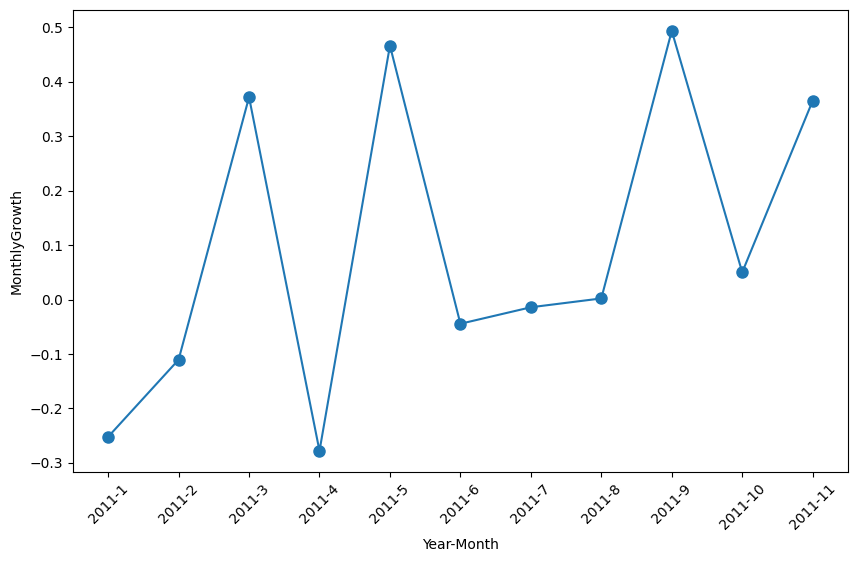

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the line chart
ax.plot(tx_revenue['InvoiceYear'].astype(str) + '-' + tx_revenue['InvoiceMonth'].astype(str), tx_revenue['MonthlyGrowth'], '-o',markersize=8)


# Set the x-axis and y-axis labels
ax.set_xlabel('Year-Month')
ax.set_ylabel('MonthlyGrowth')

xtick_labels = tx_revenue['InvoiceYear'].astype(str) + '-' + tx_revenue['InvoiceMonth'].astype(str)
ax.set_xticks(xtick_labels[::1])  # Change the step value to adjust the frequency of labels
ax.set_xticklabels(xtick_labels[::1], rotation=45)


# Show the plot
plt.show()

**MONTHLY ACTIVE CUSTOMERS IN UK**

In [ ]:
#creating a new dataframe with UK customers only
tx_uk = df.query("Country=='United Kingdom'").reset_index(drop=True)

#creating monthly active customers dataframe by counting unique Customer IDs
tx_monthly_active = tx_uk.groupby(['InvoiceYear','InvoiceMonth'])['CustomerID'].nunique().reset_index()

tx_monthly_active['MonthlyChangeCustomers'] = tx_monthly_active['CustomerID'].pct_change()

#print the dataframe
tx_monthly_active

,InvoiceYear,InvoiceMonth,CustomerID,MonthlyChangeCustomers
0,2010,12,871,NaN
1,2011,1,684,-0.214696
2,2011,2,714,0.043860
3,2011,3,923,0.292717
4,2011,4,817,-0.114843
5,2011,5,985,0.205630
6,2011,6,943,-0.042640
7,2011,7,899,-0.046660
8,2011,8,867,-0.035595
9,2011,9,1177,0.357555


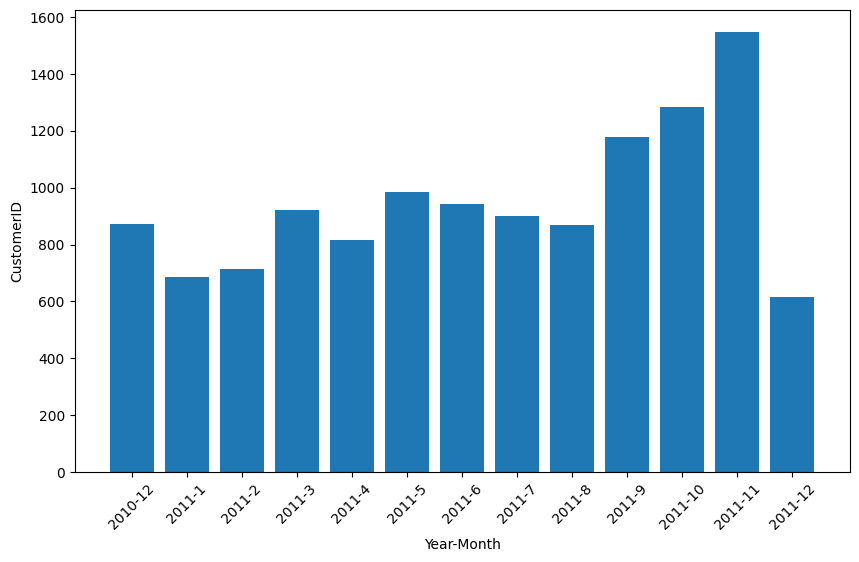

In [ ]:
#sns.barplot(x = 'time',y = 'total_bill',data = df)
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(tx_monthly_active['InvoiceYear'].astype(str) + '-' + tx_monthly_active['InvoiceMonth'].astype(str), tx_monthly_active['CustomerID'])

# Set the x-axis and y-axis labels
ax.set_xlabel('Year-Month')
ax.set_ylabel('CustomerID')

xtick_labels = tx_monthly_active['InvoiceYear'].astype(str) + '-' + tx_monthly_active['InvoiceMonth'].astype(str)
ax.set_xticks(xtick_labels[::1])  # Change the step value to adjust the frequency of labels
ax.set_xticklabels(xtick_labels[::1], rotation=45)

# Show the plot
plt.show()

**MONTHLY ORDER COUNT IN UK**

In [ ]:
#create a new dataframe for no. of order by using quantity field
tx_monthly_sales = tx_uk.groupby(['InvoiceYear','InvoiceMonth'])['Quantity'].sum().reset_index()

tx_monthly_sales['MonthlyChangeQuantity'] = tx_monthly_sales['Quantity'].pct_change()

#print the dataframe
tx_monthly_sales

,InvoiceYear,InvoiceMonth,Quantity,MonthlyChangeQuantity
0,2010,12,298101,NaN
1,2011,1,237381,-0.203689
2,2011,2,225641,-0.049456
3,2011,3,279843,0.240213
4,2011,4,257666,-0.079248
5,2011,5,306452,0.189338
6,2011,6,258522,-0.156403
7,2011,7,324129,0.253777
8,2011,8,319804,-0.013343
9,2011,9,458490,0.433659


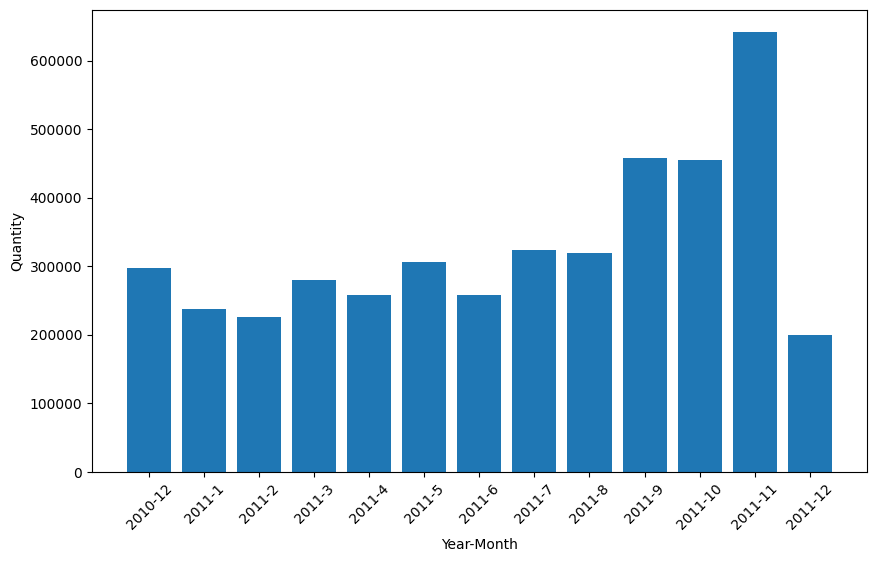

In [ ]:
#sns.barplot(x = 'time',y = 'total_bill',data = df)
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(tx_monthly_sales['InvoiceYear'].astype(str) + '-' + tx_monthly_sales['InvoiceMonth'].astype(str), tx_monthly_sales['Quantity'])

# Set the x-axis and y-axis labels
ax.set_xlabel('Year-Month')
ax.set_ylabel('Quantity')

xtick_labels = tx_monthly_sales['InvoiceYear'].astype(str) + '-' + tx_monthly_sales['InvoiceMonth'].astype(str)
ax.set_xticks(xtick_labels[::1])  # Change the step value to adjust the frequency of labels
ax.set_xticklabels(xtick_labels[::1], rotation=45)

# Show the plot
plt.show()

**AVERAGE REVENUE PER ORDER IN MONTH IN UK**

In [ ]:
# create a new dataframe for average revenue by taking the mean of it
tx_monthly_order_avg = tx_uk.groupby(['InvoiceYear','InvoiceMonth'])['Revenue'].mean().reset_index()


tx_monthly_order_avg['MonthlyChangeRevenuePerMonth'] = tx_monthly_order_avg['Revenue'].pct_change()

#print the dataframe
tx_monthly_order_avg

,InvoiceYear,InvoiceMonth,Revenue,MonthlyChangeRevenuePerMonth
0,2010,12,16.865860,NaN
1,2011,1,13.614680,-0.192767
2,2011,2,16.093027,0.182035
3,2011,3,16.716166,0.038721
4,2011,4,15.773380,-0.056400
5,2011,5,17.713823,0.123020
6,2011,6,16.714748,-0.056401
7,2011,7,15.723497,-0.059304
8,2011,8,17.315899,0.101275
9,2011,9,18.931723,0.093315


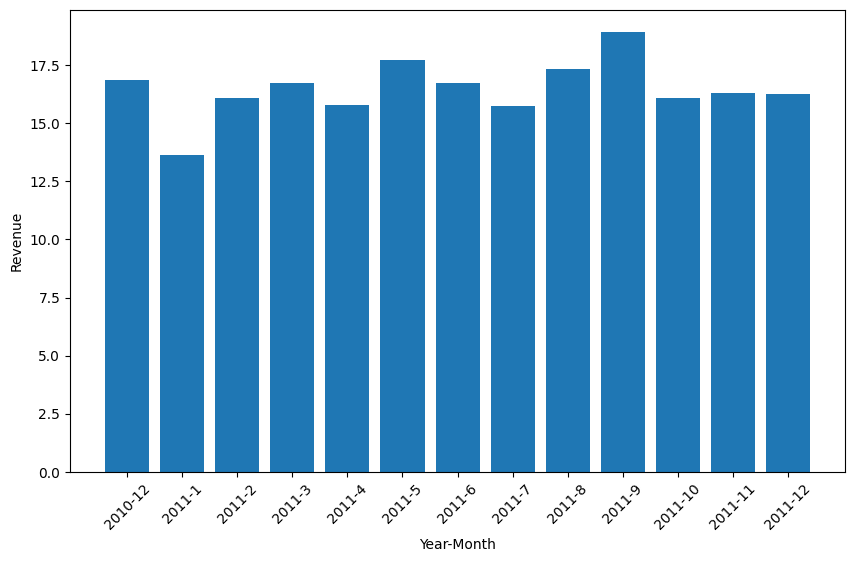

In [ ]:
#sns.barplot(x = 'time',y = 'total_bill',data = df)
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(tx_monthly_order_avg['InvoiceYear'].astype(str) + '-' + tx_monthly_order_avg['InvoiceMonth'].astype(str), tx_monthly_order_avg['Revenue'])

# Set the x-axis and y-axis labels
ax.set_xlabel('Year-Month')
ax.set_ylabel('Revenue')

xtick_labels = tx_monthly_order_avg['InvoiceYear'].astype(str) + '-' + tx_monthly_order_avg['InvoiceMonth'].astype(str)
ax.set_xticks(xtick_labels[::1])  # Change the step value to adjust the frequency of labels
ax.set_xticklabels(xtick_labels[::1], rotation=45)

# Show the plot
plt.show()

**CUSTOMERS DISTRIBUTION EXISTING AND NEW**

In [ ]:
#****************************************
#THE IDE BEHIND THIS GROUPBY IS THAT 
# WOH PERTICULAR CUSTOMER YEAR MONTH WISE KITNE BAR PRESENT HAI , AGAR 1 SE JYADA HAI TOH 'EXISTING CUSTOMER HAI 
# IF IT IS ONE THEN WOH PAHALE BAR AAYA HAI
#*************************************

#YOU CAN CHECK IT BY CHECKING TOTAL NO. OF UNIQUE CUSTOMER ID'S
# tx_uk['CustomerID'].nunique()
# tx_min_purchase['CustomerID'].nunique()
#****************************************

#tx_uk1= tx_uk[~(tx_uk['InvoiceYear']!=2011 ) & (tx_uk['InvoiceMonth']!=12)]
#print(tx_uk.shape ,tx_uk1.shape )

#tx_min_purchase = tx_uk.groupby(['CustomerID','InvoiceYear','InvoiceMonth'])['InvoiceDate'].count().reset_index()
tx_min_purchase = tx_uk.groupby(['InvoiceYear','InvoiceMonth','CustomerID'])['InvoiceDate'].count().reset_index()
#tx_min_purchase = tx_uk.groupby(['InvoiceYear','InvoiceMonth'])['CustomerID'].count().reset_index()
# def temp(row):
#   if (row['InvoiceDate'] == 1):
#     return "New"
#   else:
#     return "Existing"
# tx_min_purchase['Type'] = tx_min_purchase.apply(temp,axis=1)
# tx_min_purchase

# tx_uk_1 = pd.merge(tx_uk,tx_min_purchase[['InvoiceYear','InvoiceMonth','CustomerID','Type']] , on = 'CustomerID' , how='left')
# tx_uk_1.head(5)

# #calculate the Revenue per month for each user type
# tx_user_type_revenue = tx_uk_1.groupby(['InvoiceYear_x','InvoiceMonth_x','Type'])['Revenue'].sum().reset_index()
# tx_user_type_revenue

In [ ]:
#create a dataframe contaning CustomerID and first purchase date
tx_uk['InvoiceYearMonth'] = tx_uk['InvoiceDate'].map(lambda date: 100*date.year + date.month)
tx_min_purchase = tx_uk.groupby('CustomerID').InvoiceDate.min().reset_index()
tx_min_purchase.columns = ['CustomerID','MinPurchaseDate']
tx_min_purchase['MinPurchaseYearMonth'] = tx_min_purchase['MinPurchaseDate'].map(lambda date: 100*date.year + date.month)

#merge first purchase date column to our main dataframe (tx_uk)
tx_uk = pd.merge(tx_uk, tx_min_purchase, on='CustomerID')
print(tx_uk.shape)
tx_uk.head()


(361878, 14)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,Revenue,InvoiceYearMonth,MinPurchaseDate,MinPurchaseYearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,15.30,201012,2010-12-01 08:26:00,201012
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,201012,2010-12-01 08:26:00,201012
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,22.00,201012,2010-12-01 08:26:00,201012
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,201012,2010-12-01 08:26:00,201012
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,20.34,201012,2010-12-01 08:26:00,201012


In [ ]:
#create a column called User Type and assign Existing 
#if User's First Purchase Year Month before the selected Invoice Year Month
tx_uk['UserType'] = 'New'
tx_uk.loc[tx_uk['InvoiceYearMonth']>tx_uk['MinPurchaseYearMonth'],'UserType'] = 'Existing'

#calculate the Revenue per month for each user type
tx_user_type_revenue = tx_uk.groupby(['InvoiceYearMonth','UserType'])['Revenue'].sum().reset_index()


tx_user_type_revenue = tx_user_type_revenue.query("InvoiceYearMonth != 201012 and InvoiceYearMonth != 201112")
tx_user_type_revenue

,InvoiceYearMonth,UserType,Revenue
1,201101,Existing,195275.510
2,201101,New,156705.770
3,201102,Existing,220994.630
4,201102,New,127859.000
5,201103,Existing,296350.030
6,201103,New,160567.840
7,201104,Existing,268226.660
8,201104,New,108517.751
9,201105,Existing,434725.860
10,201105,New,90847.490


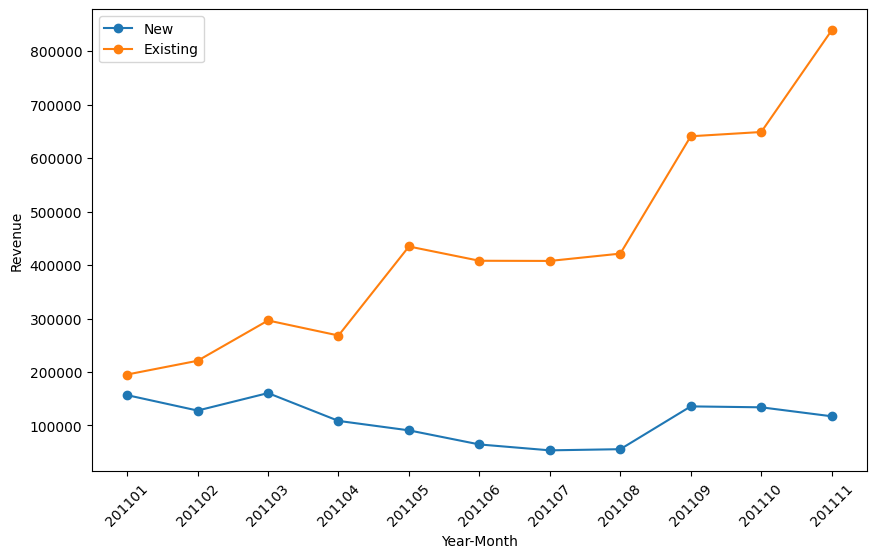

In [ ]:
df_pivot = tx_user_type_revenue.pivot_table(values='Revenue', index='InvoiceYearMonth', columns='UserType', aggfunc='sum')

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10,6))

# Plot the two lines for new and existing categories
ax.plot(df_pivot.index, df_pivot['New'] ,'-o',label='New')
ax.plot(df_pivot.index, df_pivot['Existing'],'-o',label='Existing')

ax.set_xlabel('Year-Month')
ax.set_ylabel('Revenue')

xtick_labels = df_pivot.index
ax.set_xticks(xtick_labels[::1])  # Change the step value to adjust the frequency of labels
ax.set_xticklabels(xtick_labels[::1], rotation=45)

ax.legend()
# Show the plot
plt.show()

**NEW CUSTOMER RATIO**

In [ ]:
#create a dataframe that shows new user ratio - we also need to drop NA values (first month new user ratio is 0)
tx_user_ratio = tx_uk.query("UserType == 'New'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique()/tx_uk.query("UserType == 'Existing'").groupby(['InvoiceYearMonth'])['CustomerID'].nunique() 
tx_user_ratio = tx_user_ratio.reset_index()
tx_user_ratio = tx_user_ratio.dropna()

#print the dafaframe
tx_user_ratio

,InvoiceYearMonth,CustomerID
1,201101,1.124224
2,201102,0.904000
3,201103,0.792233
4,201104,0.510166
5,201105,0.343793
6,201106,0.281250
7,201107,0.236589
8,201108,0.192572
9,201109,0.304878
10,201110,0.328852


**RETENTION RATE**

In [ ]:
#identify which users are active by looking at their revenue per month
tx_user_purchase = tx_uk.groupby(['CustomerID','InvoiceYearMonth'])['Revenue'].sum().reset_index()

#create retention matrix with crosstab
tx_retention = pd.crosstab(tx_user_purchase['CustomerID'], tx_user_purchase['InvoiceYearMonth']).reset_index()

tx_retention.head()



InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12346.0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,12747.0,1,1,0,1,0,1,1,0,1,0,1,1,1
2,12748.0,1,1,1,1,1,1,1,1,1,1,1,1,1
3,12749.0,0,0,0,0,0,1,0,0,1,0,0,1,1
4,12820.0,0,1,0,0,0,0,0,0,0,1,1,0,1


In [ ]:
#create an array of dictionary which keeps Retained & Total User count for each month
cal_months_list = tx_retention.columns[2:]
cal_months_list

Index([201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109,
       201110, 201111, 201112],
      dtype='object', name='InvoiceYearMonth')

In [ ]:
retention_array = []
for i in range(len(cal_months_list)-1):
  
    retention_data = {}
    selected_month = cal_months_list[i+1]
    prev_month = cal_months_list[i]

    # print(selected_month)
    # print('--->',prev_month)
    retention_data['InvoiceYearMonth'] = int(selected_month)
    retention_data['TotalUserCount'] = tx_retention[selected_month].sum()
    retention_data['TotalUserCount_PreviousMonth'] = tx_retention[prev_month].sum()

    # here this is filter condition : -----> tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)]
    #only take the sum if in both months the customer is active
    retention_data['RetainedUserCount'] = tx_retention[(tx_retention[selected_month]>0) & (tx_retention[prev_month]>0)][selected_month].sum()

    # USE THIS TO VALIDATE ABOVE STEPS
    # temp = tx_retention[(tx_retention[201102]>0) & (tx_retention[201101]>0)]#[201102].sum()
    # print(temp.shape)
    # temp
    
    retention_array.append(retention_data)

    

In [ ]:
#convert the array to dataframe and calculate Retention Rate
tx_retention = pd.DataFrame(retention_array)
tx_retention['RetentionRate'] = (tx_retention['RetainedUserCount']/tx_retention['TotalUserCount']) * 100
tx_retention

,InvoiceYearMonth,TotalUserCount,TotalUserCount_PreviousMonth,RetainedUserCount,RetentionRate
0,201102,714,684,263,36.834734
1,201103,923,714,305,33.044420
2,201104,817,923,310,37.943696
3,201105,985,817,369,37.461929
4,201106,943,985,417,44.220573
5,201107,899,943,379,42.157953
6,201108,867,899,391,45.098039
7,201109,1177,867,417,35.429057
8,201110,1285,1177,502,39.066148
9,201111,1548,1285,616,39.793282
